<a href="https://colab.research.google.com/github/devshah21/Music-Genre-Classifier/blob/main/Music_genre_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"devshah2021","key":"9ee02bf544ec28e077278fdc69adfb4e"}'}

In [3]:
!mkdir -p ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets list

ref                                                             title                                         size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  -------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
ahsan81/hotel-reservations-classification-dataset               Hotel Reservations Dataset                   480KB  2023-01-04 12:50:31           2646        101  1.0              
thedevastator/global-fossil-co2-emissions-by-country-2002-2022  Emissions by Country, 2002-2022              621KB  2023-01-02 20:10:36           1379         51  1.0              
die9origephit/fifa-world-cup-2022-complete-dataset              Fifa World Cup 2022: Complete Dataset          7KB  2022-12-18 22:51:11           5921        187  1.0              
rakkesharv/spotify-top-10000-streamed-songs                     Spotify Top 10000 Streamed Song

In [7]:
!kaggle datasets download -d andradaolteanu/gtzan-dataset-music-genre-classification

100% 1.21G/1.21G [00:42<00:00, 31.2MB/s]
100% 1.21G/1.21G [00:42<00:00, 30.5MB/s]


In [8]:
!unzip gtzan-dataset-music-genre-classification.zip


Archive:  gtzan-dataset-music-genre-classification.zip
  inflating: Data/features_30_sec.csv  
  inflating: Data/features_3_sec.csv  
  inflating: Data/genres_original/blues/blues.00000.wav  
  inflating: Data/genres_original/blues/blues.00001.wav  
  inflating: Data/genres_original/blues/blues.00002.wav  
  inflating: Data/genres_original/blues/blues.00003.wav  
  inflating: Data/genres_original/blues/blues.00004.wav  
  inflating: Data/genres_original/blues/blues.00005.wav  
  inflating: Data/genres_original/blues/blues.00006.wav  
  inflating: Data/genres_original/blues/blues.00007.wav  
  inflating: Data/genres_original/blues/blues.00008.wav  
  inflating: Data/genres_original/blues/blues.00009.wav  
  inflating: Data/genres_original/blues/blues.00010.wav  
  inflating: Data/genres_original/blues/blues.00011.wav  
  inflating: Data/genres_original/blues/blues.00012.wav  
  inflating: Data/genres_original/blues/blues.00013.wav  
  inflating: Data/genres_original/blues/blues.00014.wa

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from glob import glob 
import IPython
import IPython.display as ipd

import librosa
import librosa.display

In [16]:
audiofiles = glob('/content/Data/genres_original/*/*.wav')
num_files = len(audiofiles)
print("Number of .wav files:", num_files)

Number of .wav files: 1000


In [17]:
import random
number = random.randint(0, num_files -1)
ipd.Audio(audiofiles[number])

In [23]:
from scipy.io.wavfile import read
sr, y = read(audiofiles[number])
print('y is a numpy array and sr is a sample rate, it is the number of samples per second of audio.')
print('sr is', sr)
print('y is', y)
print('the shape of y is', y.shape)

y is a numpy array and sr is a sample rate, it is the number of samples per second of audio.
sr is 22050
y is [-1271  1755   299 ...  3142  2660  1777]
the shape of y is (661504,)


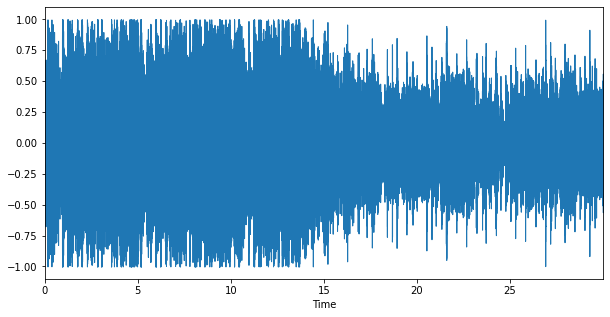

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
y, sr = librosa.load(audiofiles[number])
ld.waveplot(y, sr=sr)
plt.show()

(661504,)


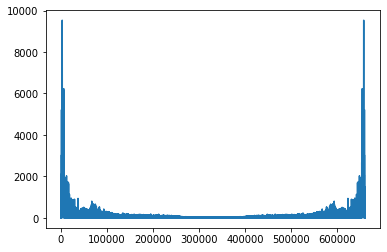

In [33]:
from scipy.fft import fft
import numpy as np
fourier = fft(y)

fourier = np.abs(fourier)

import matplotlib.pyplot as plt
plt.plot(fourier)
plt.show()

In [37]:
stft = librosa.stft(y)
s1 = librosa.amplitude_to_db(np.abs(stft), ref=np.max)
print(s1.shape)

(1025, 1293)


Plotting a Spectogram

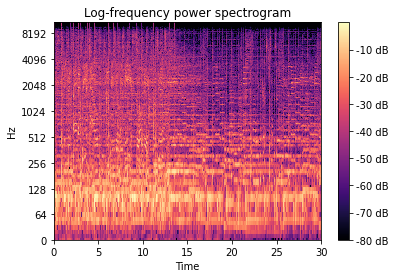

In [38]:
librosa.display.specshow(s1, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Log-frequency power spectrogram')
plt.show()